In [1]:
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1011. NC Well Metals/P1011.2. Analyses/P1011.2.3. ML Visualizations/P1011.2.3.1. Confusion Matrix Figure/Output')
cur_date = "092024"

library(readxl)
library(tidyverse)
library(ggrepel)
library(tidytext)
library(ggsci)

#reading in files
as_confusion_matrix_df = data.frame(read_excel("Input/As_Prediction_Confusion_Matrix_051624.xlsx"), Outcome = "Arsenic")
mn_confusion_matrix_df = data.frame(read_excel("Input/Mn_Prediction_Confusion_Matrix_051724.xlsx"), Outcome = "Manganese")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ADD WORDS.

In [2]:
# creating 1 df
confusion_matrix_df = rbind(as_confusion_matrix_df, mn_confusion_matrix_df) %>%
    # removing balanced accuracy since the values are the same as AUC
    select(-Balanced.Accuracy)

head(confusion_matrix_df)

,Model,Use_Case,Kernel,Sensitivity,Specificity,PPV,NPV,AUC,Outcome
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,RF Classification,1,NA,0.6225071,0.8862069,0.5560080,0.9114514,0.7543570,Arsenic
2,RF Classification,2,NA,0.5621083,0.8913793,0.5438852,0.8993424,0.7267438,Arsenic
3,RF Classification,3,NA,0.4384615,0.8709696,0.4534548,0.8721466,0.6547156,Arsenic
4,RF Classification,4,NA,0.7116809,0.8384321,0.5022757,0.9279459,0.7750565,Arsenic
5,SVM,1,svmLinear,0.7500000,0.8491379,0.5270270,0.9380952,0.7995690,Arsenic
6,SVM,1,svmRadial,0.5769231,0.8922414,0.5454545,0.9039301,0.7345822,Arsenic


In [3]:
# making the df longer based on the metrics
longer_confusion_matrix = confusion_matrix_df %>%
    # only visualizing the first two use cases
    #filter(Use_Case <= 2) %>%
    pivot_longer(cols = 4:8, names_to = "Metric", values_to = "Value") %>%
    # cleaning up model names
    mutate(Model = ifelse(Model == "RF Classification", "Random Forest (RF)", "Support Vector Machine (SVM)")) %>%
    # only visualizing RF and linear SVM models
    filter(Kernel %in% c("svmLinear", NA)) 

# putting into a factor to reorder
#longer_confusion_matrix$Model = factor(longer_confusion_matrix$Model, levels = c("RF", "SVM"))
longer_confusion_matrix$Metric = factor(longer_confusion_matrix$Metric, levels = c("NPV", "PPV", "Specificity",
                                                                                    "Sensitivity", "AUC"))
    
head(longer_confusion_matrix)

Model,Use_Case,Kernel,Outcome,Metric,Value
<chr>,<dbl>,<chr>,<chr>,<fct>,<dbl>
Random Forest (RF),1,NA,Arsenic,Sensitivity,0.6225071
Random Forest (RF),1,NA,Arsenic,Specificity,0.8862069
Random Forest (RF),1,NA,Arsenic,PPV,0.5560080
Random Forest (RF),1,NA,Arsenic,NPV,0.9114514
Random Forest (RF),1,NA,Arsenic,AUC,0.7543570
Random Forest (RF),2,NA,Arsenic,Sensitivity,0.5621083


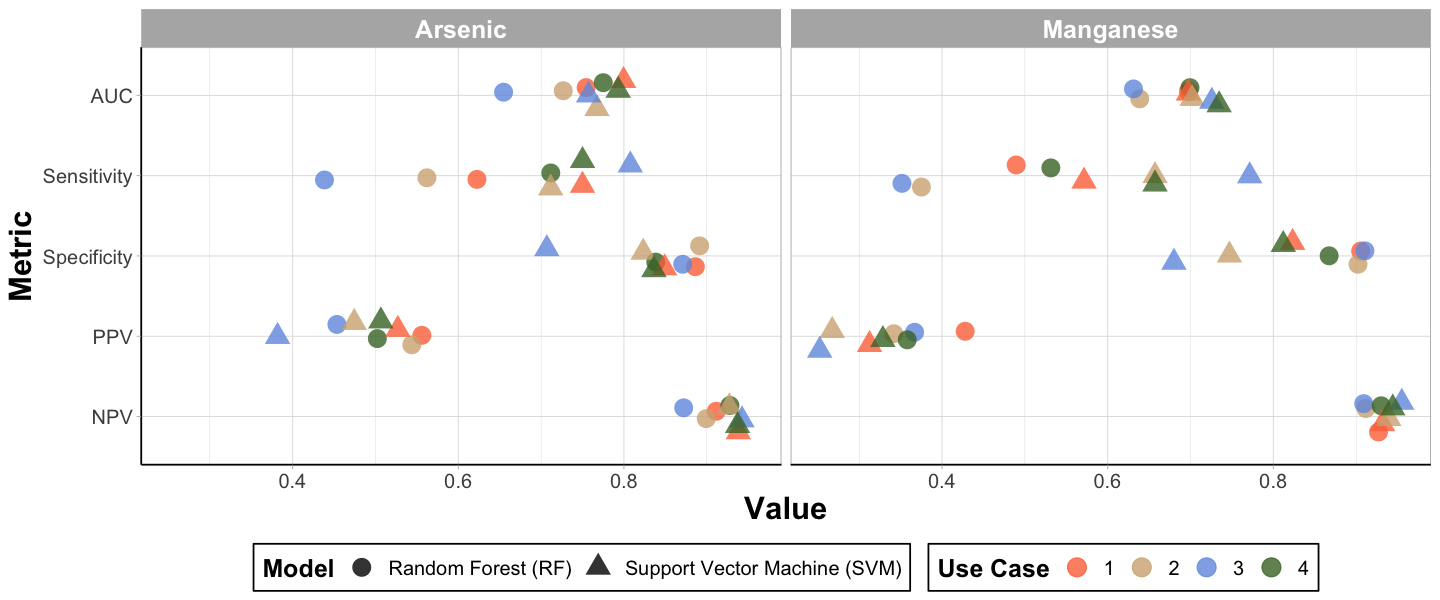

In [4]:
options(repr.plot.width=12, repr.plot.height=5) #changing size

# choosing palette from package
simpson_colors = pal_simpsons()(9)

new_facet_labels = c("Use Case 1", "Use Case 2", "Use Case 3", "Use Case 4")
names(new_facet_labels) = 1:4

Figure2 = ggplot() + 
  geom_point(data = longer_confusion_matrix, aes(x = Value, y = Metric, color = as.factor(Use_Case), shape = Model), 
             position = position_jitter(h = 0.2), size = 5, alpha = 0.8) + 

  facet_wrap(~Outcome, labeller = labeller(Use_Case = new_facet_labels)) +

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 15), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        legend.position = "bottom", 
        legend.background = element_rect(colour = 'black', fill = 'white', linetype = 'solid'),
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  xlab('Value') + ylab('Metric') + #changing axis labels 

  scale_color_manual(name = "Use Case", 
                     values = simpson_colors[c(5,4,2,9)]
                    ) + 
  scale_shape_manual(name = "Model",
                     values = c(16,17))

Figure2

In [5]:
# exporting figure
ggsave(Figure2, 
       filename = 'Figure2.pdf',
       path = Output,
       width = 12, height = 5)